In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("../data/raw_output/shear_instability_state_Ri=0.1.nc")

In [3]:
xF = np.append(ds.xF.values, ds.xF[0] + 10)
yF = np.append(ds.yF.values, ds.yF[0] + 10)
zF = ds.zF.values

ds = ds.assign_coords({
    "dx": xr.DataArray(np.diff(xF), dims=("xC",)),
    "dy": xr.DataArray(np.diff(yF), dims=("yC",)),
    "dz": xr.DataArray(np.diff(zF), dims=("zC",))
})

In [4]:
t = ds["time"];
c = ds["c"]
ΔV = ds.dx * ds.dy * ds.dz
M = (c*ΔV).sum(["xC", "yC", "zC"])

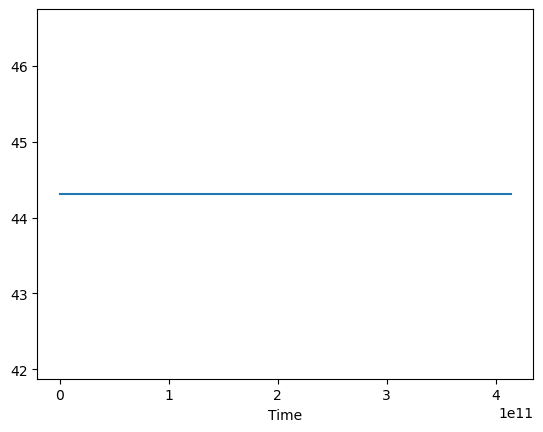

In [5]:
M.plot();

In [6]:
z = ds.zC
z̄ = (z*c*ΔV).sum(["xC", "yC", "zC"]) / M;

(-3.0, 3.0)

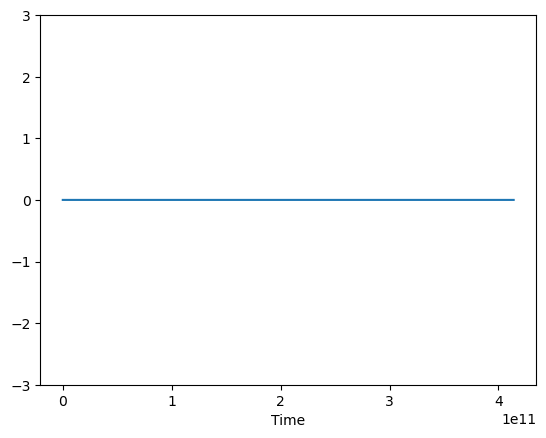

In [7]:
z̄.plot()
plt.ylim(-3, 3)

In [8]:
z_prime = z - z̄
zvar = ((z_prime**2)*c*ΔV).sum(["xC", "yC", "zC"]) / M;
zσ = np.sqrt(zvar);

(0.0, 0.5359071316749559)

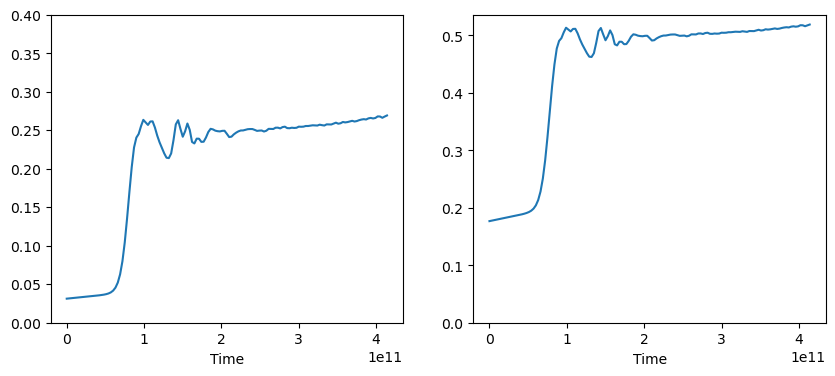

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
zvar.plot()
plt.ylim(0, 0.4)
plt.subplot(1,2,2)
zσ.plot()
plt.ylim(0, None)

In [10]:
ds.close()